# SR-Dyna (Detour Task)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import srdyna
import importlib

In [9]:
importlib.reload(srdyna)

<module 'srdyna' from '/Users/jeremygordon/repos/notebooks/sr-dyna-impl/srdyna.py'>

Loaded 10x10 world


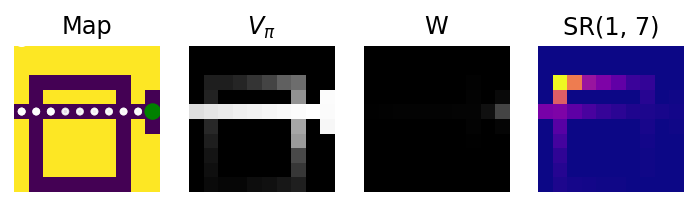

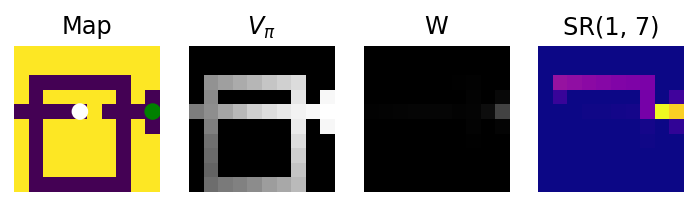

In [10]:
# Detour Task
REPLAY = "sufficient"
EXPLORE_STEPS = 10000
POST_REWARD_TRIALS = 5
WALL_LEARNING_STEPS = 40
REPLAY_STEPS = {
    "insufficient": 10,
    "sufficient": 10000
}[REPLAY]
env = srdyna.SimpleGridWorld(world='worlds/detour_task.txt')
S_LOC = (0, 5)
agent = srdyna.SRDyna(id=0, loc=S_LOC, env=env)

# Explore
for i in range(EXPLORE_STEPS):
    agent.step(random_policy=True)

# Add reward
R_LOC = (9, 5)
env.reward_locs[R_LOC] = 10

for i in range(POST_REWARD_TRIALS):
    # Repeated trials from S (until reward reached)
    agent.terminate_episode(reset_state=env.state_at_loc(S_LOC))
    done = False
    steps = 0
    MAX_STEPS = 1000
    while not done and steps < MAX_STEPS:
        done = agent.step(verbose=False)
        steps += 1

fig, axs = plt.subplots(1, 4, dpi=144)
env.render(agent, ax=axs[0], last_k_steps=30)
agent.render_state_values(ax=axs[1], fig=fig)
agent.render_W(ax=axs[2], fig=fig)
agent.render_sr(env.state_at_loc((1, 7)), ax=axs[3])
plt.show()

# Add barrier
B_LOC = (5, 5)
S2_LOC = (4, 5)
env.wall_coords.append(B_LOC)
env.map = env.get_map()
    
for i in range(WALL_LEARNING_STEPS):
    # One-step runs from left of new wall
    reset_state = env.state_at_loc(S2_LOC)
    agent.terminate_episode(reset_state=reset_state)
    agent.step()

for i in range(REPLAY_STEPS):
    # One-step replay samples from random sa's
    from_sa = agent.random_experience_sa()
    experiences_from_sa = agent.weighted_experience_samples(k=1, from_sa=from_sa)
    agent.learn_offline(samples=experiences_from_sa)
    
fig, axs = plt.subplots(1, 4, dpi=144)
env.render(agent, ax=axs[0], last_k_steps=30)
agent.render_state_values(ax=axs[1], fig=fig)
agent.render_W(ax=axs[2], fig=fig)
agent.render_sr(env.state_at_loc((1, 7)), ax=axs[3])
plt.show()

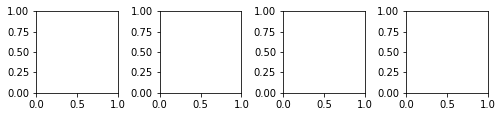

In [11]:
agent.record_trials(title="detour", start_locs=[(0, 5), (4, 5), (7, 0), (7, 7)])